# A4: Solving nonlinear equations in 1d II

In [10]:
# useful definitions that we've used so far:
using LaTeXStrings
using Polynomials
using PrettyTables

function simple_iteration( g, x1; N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        elseif (x[end] == Inf)
            @warn "simple iteration diverges to Inf";
            break
        elseif (x[end] == -Inf)
            @warn "simple iteration diverges to -Inf";
            break
        end 
    end
    return x
end

function relaxation( f, λ, x1; N=100, tol=1e-10)
    x = [x1]
    r = 0.;
    for n in 2:N
        push!( x, x[n-1] - λ*f(x[n-1]) )
        r = abs(f(x[end]));
        if (r < tol)
            return x
        end
    end
    @warn "max interations with |f| = $r";
    return x
end

function Newton( f, f_prime, x1; N=100, tol=1e-10)
    x = [x1]
    r = 0;
    for n in 2:N
        push!( x, x[n-1] - f(x[n-1])/f_prime(x[n-1]) )
        r = abs(f(x[end]));

        if (r < tol)
            return x
        end
    end
    @warn "max interations |f| = $r";
    return x
end

function orderOfConvergence( x, ξ; α=0)
    err = @. abs(x - ξ)
    logerr = @. log10( err )
    ratios = [NaN; [logerr[i+1] / logerr[i] for i in 1:length(logerr)-1]]
    if (α == 0) 
        α = ratios[end]
    end
    αr = round(α, sigdigits=3)
    mu = [NaN; [err[i+1] / err[i]^α for i in 1:length(err)-1]]
    pretty_table( 
        [1:length(x) x err ratios mu];
        column_labels = [
           ["iteration", "sequence", "abs. error", "ratio", "μ (α = $αr)"],
           [ "n", "x[n]", "e[n]=|x[n]-ξ|", "log e[n]/log e[n-1]", "e[n]/e[n-1]^α"   ]
       ]
    )
end

function μ( x, ξ; α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

μ (generic function with 1 method)

Recall that Newton's Method is given by the iteration $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. This method is guaranteed to converge under the following conditions:

<div class='alert alert-block alert-info'><b>Theorem.</b> 

Suppose $f: [a,b] \to \mathbb R$ is twice continuously differentiable with $f(\xi) = 0$ and $f'(\xi) \not= 0$ for some $\xi \in [a,b]$. Further suppose that 

\begin{align}
    \left|\frac{f''(x)}{f'(y)}\right| \leq A
\end{align}

for all $x,y \in [a,b]$. Then, the Newton iteration $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ converges at least quadratically to $\xi$ for all $x_1 \in [a,b]$ such that $|x_1 - \xi| \leq A^{-1}$.

</div> 

Each of the following parts is worth **50 pts**.

## A. Repeated Roots

Suppose that $f(\xi) = f'(\xi) = 0$ (so that the above theorem is not applicable) and that there exists $0 < m < M < 2m$ such that $m < |f''(x)| < M$ for all $x \in [\xi-\delta, \xi+\delta]$. 

1. ✍ Show that there exists $\eta_n, \theta_n$ between $x_n$ and $\xi$ such that the sequence generated by Newton's method ($x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$) satisfies

\begin{align}
    x_{n+1} - \xi &= \frac{1}{2} \frac{f''(\eta_n)}{f'(x_n)} (x_n - \xi)^2  \nonumber\\
    %
    &= \frac{1}{2} \frac{f''(\eta_n)}{f''(\theta_n)} (x_n - \xi).
\end{align}

<span style="color:red">Note: there was a sign error in the original version </span>

<div class='alert alert-block alert-success'><b>Answer.</b> 

By the Taylor remainder theorem, there exists $\eta_n$ between $x_n$ and $\xi$ such that 

\begin{align}
    0 = f(\xi) = f(x_n) + f'(x_n) (\xi - x_n) + \frac{1}2 f''(\eta_n) (\xi - -x_n)^2. 
\end{align}

Therefore, we have

\begin{align}
    x_{n+1} - \xi &= x_n - \xi - \frac{f(x_n)}{f'(x_n)} \nonumber\\
    %
    &= \frac
        {-f'(x_n) ( \xi - x_n) - f(x_n) }
        {f'(x_n)} \\
    %
    &= \frac{1}2 \frac
        {f''(\eta_n)}
        {f'(x_n)}
    (x_n - \xi)^2
\end{align}

Since $f'(\xi) = 0$ and by the mean value theorem, there exists $\theta_n$ between $x_n$ and $\xi$ such that $f'(x_n) = f'(x_n) - f'(\xi) = f''(\theta_n) ( x_n - \xi )$ and so 

\begin{align}
x_{n+1} - \xi 
%
&= \frac{1}2 \frac
        {f''(\eta_n)}
        {f'(x_n) - f'(\xi)}
    (x_n - \xi)^2 \nonumber\\
%
&= \frac{1}2 \frac
        {f''(\eta_n)}
        {f''(\theta_n) (x_n-\xi)}
    (x_n - \xi)^2 \nonumber\\
%
&= \frac{1}2 \frac
        {f''(\eta_n)}
        {f''(\theta_n)}
    (x_n - \xi)
\end{align}


</div> 

2. ✍ Hence show that Newton's method converges at least linearly in this case. 

<div class='alert alert-block alert-success'><b>Answer.</b> 

Since $0 < m < f''(x) < M < 2m$ for all $x \in [\xi-\delta, \xi+\delta]$, we have: if $x_n \in [\xi- \delta, \xi +\delta]$, then

\begin{align}
    |x_{n+1} - \xi| &\leq \frac{1}2 \left|\frac
        {f''(\eta_n)}
        {f''(\theta_n)}\right|
    \big| x_n - \xi \big| \nonumber\\
    %
    &\leq \frac12 \frac{M}{m} |x_n - \xi| 
    %
    =: L|x_n-\xi|
\end{align}

Since $L := \frac12 \frac{M}{m} < \frac12\frac{2m}{m} = 1$, we find that $x_{n+1} \in [\xi-\delta, \xi+\delta]$. Therefore, for $x_1 \in [\xi- \delta, \xi +\delta]$, the sequence $(x_n)$ is contained in $[\xi- \delta, \xi +\delta]$ and 

\begin{align}
    |x_{n+1} - \xi| \leq L |x_{n} - \xi| \leq \cdots \leq L^n |x_1 - \xi|
\end{align}

which goes to $0$ as $n \to \infty$ (and therefore $(x_n) \to \xi$).

Moreover, we have 

\begin{align}
    \lim_{n\to\infty}\frac
        {|x_{n+1} - \xi|}
        {|x_{n} -\xi|}
    = \lim_{n\to\infty} \frac{1}2 \left|\frac
        {f''(\eta_n)}
        {f''(\theta_n)}\right|
    %
    = \frac{1}{2} \left|\frac
        {f''(\xi)}
        {f''(\xi)}\right| = \frac12
\end{align}

Therefore, the convergence is linear (with asymptotic error constant $\frac12$).

</div> 

3. 💻 Verify this numerically by finding the zero of $f(x) = (x-1)^2$ and estimating the asymptotic error constant $\mu$.

<div class='alert alert-block alert-success'><b>Answer.</b> 

We have $f(1) = f'(1) = 0$ and $f''(x) = 2$ which satisfies $0 < \frac32 < f''(x) < \frac52$ for all $x\in \mathbb R$. In particular, $f$ satisfies the conditions stated above. That is, we expect the Newton iteration to converge linearly with asymptotic error constant $\frac12$ which is what we observe numerically:

</div> 

In [ ]:
f = x -> (x-1)^2
df = x -> 2*(x-1)

x = Newton( f, df, 2. ) 
orderOfConvergence( x, 1., α=1 )

┌───────────┬──────────┬───────────────┬─────────────────────┬───────────────┐
│ iteration │ sequence │    abs. error │               ratio │   μ (α = 1.0) │
│         n │     x[n] │ e[n]=|x[n]-ξ| │ log e[n]/log e[n-1] │ e[n]/e[n-1]^α │
├───────────┼──────────┼───────────────┼─────────────────────┼───────────────┤
│       1.0 │      2.0 │           1.0 │                 NaN │           NaN │
│       2.0 │      1.5 │           0.5 │                -Inf │           0.5 │
│       3.0 │     1.25 │          0.25 │                 2.0 │           0.5 │
│       4.0 │    1.125 │         0.125 │                 1.5 │           0.5 │
│       5.0 │   1.0625 │        0.0625 │             1.33333 │           0.5 │
│       6.0 │  1.03125 │       0.03125 │                1.25 │           0.5 │
│       7.0 │  1.01562 │      0.015625 │                 1.2 │           0.5 │
│       8.0 │  1.00781 │     0.0078125 │             1.16667 │           0.5 │
│       9.0 │  1.00391 │    0.00390625 │            

4. ✍ Show that $g(x) := \frac{f(x)}{f'(x)}$ is a function such that $g(\xi) = 0$ but $g'(\xi) \not= 0$. Explain why this may be useful in practice.

<div class='alert alert-block alert-success'><b>Answer.</b> 

First, notice that there exists $h$ with $f(x) = (x-\xi)^2 h(x)$ and $h(\xi) \not= 0$. Then, we have 

\begin{align}
    g(x) &= \frac{f(x)}{f'(x)} = \frac{(x-\xi)^2 h(x)}{ 2(x-\xi) h(x) + (x-\xi)^2 h'(x) } \nonumber\\
    %
    &= \frac{(x-\xi) h(x)}{ 2 h(x) + (x-\xi) h'(x) }.
\end{align}

Therefore, we have $g(\xi) = 0$. Moreover, 

\begin{align}
    g'(x) = \frac
        { h(x) + (x-\xi)h'(x) }
        { 2 h(x) + (x-\xi) h'(x) }
    - \frac{(x-\xi) h(x)}{ \big( 2 h(x) + (x-\xi) h'(x) \big)^2}
    \big( 3 h'(x) + (x-\xi) h''(x) \big)
\end{align}

with $g'(\xi) = \frac{1}{2}$. 

If $\xi$ is a repeated root of $f$, then we have seen that the Newton iteration can converge slower than quadratically (we saw linear convergence in parts 2 and 3). However, $\xi$ is also a root of $g$ but now it is a simple root ($g'(\xi) \not= 0$). Therefore, in practice, if one can show that $g''(x)$ is bounded near $\xi$, then Newton's iteration starting near $\xi$ will converge quadratically. 

</div> 

## C. Newton's Method Examples

1. 💻 Run Newton's Method on the following functions (it may help to plot the functions in order to choose a good initial point $x_1$)

\begin{align}
    f(x) &= x^3 - 2x^2 - 5 \nonumber\\
    g(x) &= e^x - x - 1     \nonumber\\
    h(x) &= \frac{x}{1+x^2} \nonumber\\ 
    j(x) &= \sqrt[3]{x}
\end{align}

2. 💻 If the iteration converges, what is the (numerically calculated) order of convergence? 
3. ✍ In each case, explain why your observations do not contradict the Theorem stated above and do not contradict your observations made in part A.

<div class='alert alert-block alert-success'><b>Answer.</b> 

First, we note that $g(0) = h(0) = j(0) = 0$ and, because $f(2) < 0 < f(3)$ (and $f$ is continuous), $f$ has a root $\xi \in [2,3]$:

</div> 

In [8]:
f = x -> x^3 - 2*x^2 - 5
df = x -> 3*x^2 - 4*x 
d2f = x -> 6*x - 4

g = x -> exp(x) - x - 1
dg = x -> exp(x) - 1

h = x -> x/(1 + x^2)
dh = x -> (1 - x^2)/(1 + x^2)^2
d3h = x -> -6*( x^4 - 6*x^2 + 1 )/(x^2 + 1)^4

# I write the function like this so that we choose the real cube root
# i.e. -1, exp( ± π/3 ) are all cube roots of -1 
j = x -> sign(x) * abs(x)^(1/3)
dj = x -> (1/3) * (x^2)^(-1/3)

# plot( [f, g, h, j] , -1, 3, ylims=(-1,2), label=[L"f" L"g" L"h" L"j"], lw = 2)
# hline!( [0], linestyle=:dash, primary =false )

#68 (generic function with 1 method)

<div class='alert alert-block alert-success'>

$f$:

The Newton iteration starting at $x_1 = 2$ applied to $f$ converges to $\xi \approx 2.691...$. The order of convergence appears to be quadratic (see next cell). 

 </div> 

<div class='alert alert-block alert-success'>

This behaviour is supported by the theorem from lectures (and also on the top of this notebook): $f$ is twice continuously differentiable with $f'(x) = 3x^2 - 4x$ and $f''(x) = 6x - 4$. Therefore, for $x, y \in [2,3]$, we have 

\begin{align}
    \left| \frac{f''(x)}{f'(y)} \right| \leq \frac{ 6(3)-4 }{ 3(2^2)-4(2) } = \frac{7}{2}.
\end{align}

Here, we have used the fact that $f(x) \geq f(2)$ for $x \in [2,3]$ (see graph below).

Moreover, we expect the asymptotic error constant to be $\mu = \frac{1}{2} \left| \frac{f''(\xi)}{f'(\xi)} \right|$.

</div> 

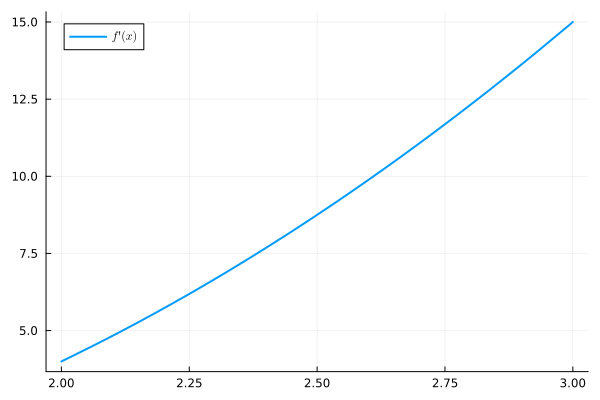

In [ ]:
plot( df, 2, 3, lw = 2, label=L"f'(x)" )

<div class='alert alert-block alert-success'>

$g$:

The Newton iteration starting at $x_1 = 1$ applied to $g$ converges to $0$. The order of convergence appears to be linear:
 </div>

In [ ]:
xg = Newton( g, dg, 1.)
orderOfConvergence( xg, 0., α=1)

┌───────────┬─────────────┬───────────────┬─────────────────────┬───────────────
│ iteration │    sequence │    abs. error │               ratio │   μ (α = 1.0 ⋯
│         n │        x[n] │ e[n]=|x[n]-ξ| │ log e[n]/log e[n-1] │ e[n]/e[n-1]^ ⋯
├───────────┼─────────────┼───────────────┼─────────────────────┼───────────────
│       1.0 │         1.0 │           1.0 │                 NaN │           Na ⋯
│       2.0 │    0.581977 │      0.581977 │                -Inf │      0.58197 ⋯
│       3.0 │    0.319055 │      0.319055 │             2.11036 │      0.54822 ⋯
│       4.0 │    0.167996 │      0.167996 │             1.56147 │      0.52654 ⋯
│       5.0 │   0.0863489 │     0.0863489 │              1.3731 │      0.51399 ⋯
│       6.0 │   0.0437957 │     0.0437957 │             1.27716 │      0.50719 ⋯
│       7.0 │   0.0220577 │     0.0220577 │             1.21925 │       0.5036 ⋯
│       8.0 │   0.0110694 │     0.0110694 │             1.18077 │      0.50183 ⋯
│       9.0 │   0.0055449 │ 

<div class='alert alert-block alert-success'>

We have $g(x) = e^x - x - 1$ and so $g'(x) = e^x - 1$ and $g(0) = g'(0) = 0$. Moreover, $g''(x) = e^x$ and so we have $0 < \frac34 < g''(x) < \frac54 < 2\frac34 = \frac32$ for all $x \in ( \log \frac34, \log \frac54 )$. As a result, there exists a closed interval about $0$ for which we may apply the result presented in section A of this assignment. That is, Newton's iteration converges linearly with asymptotic error constant $\frac12$.

</div> 

<div class='alert alert-block alert-success'>

$h$:

The Newton iteration starting at $x_1 = 0.5$ applied to $h$ converges to $0$. (We choose $x_1 \not= 1$ so that $h'(x_1) \not= 0$ and $x_2$ is well defined). The order of convergence appears to be cubic  (order 3):
 </div> 

In [ ]:
xh = Newton( h, dh, .5)
orderOfConvergence( xh, 0., α=3)

println( "theoretical value of μ = ", (1/3) * abs(d3h(0)/dh(0)) )

┌───────────┬────────────┬───────────────┬─────────────────────┬───────────────┐
│ iteration │   sequence │    abs. error │               ratio │   μ (α = 3.0) │
│         n │       x[n] │ e[n]=|x[n]-ξ| │ log e[n]/log e[n-1] │ e[n]/e[n-1]^α │
├───────────┼────────────┼───────────────┼─────────────────────┼───────────────┤
│       1.0 │        0.5 │           0.5 │                 NaN │           NaN │
│       2.0 │  -0.333333 │      0.333333 │             1.58496 │       2.66667 │
│       3.0 │  0.0833333 │     0.0833333 │             2.26186 │          2.25 │
│       4.0 │ -0.0011655 │     0.0011655 │             2.71825 │       2.01399 │
│       5.0 │ 3.16642e-9 │    3.16642e-9 │             2.89738 │           2.0 │
│       6.0 │        0.0 │           0.0 │                 Inf │           0.0 │
└───────────┴────────────┴───────────────┴─────────────────────┴───────────────┘
theoretical value of μ = 2.0


<div class='alert alert-block alert-success'> 

We have that 

\begin{align}
h(x) = \frac{x}{1+x^2}, \quad h'(x) = \frac{1-x^2}{(1+x^2)^2}, \quad h''(x) = \frac{2x(x^2-3)}{(1+x^2)^3}, \quad h'''(x) = - \frac{ 6(x^4 - 6x^2 + 1) }{ (1 + x^2)^4 }
\end{align}

and so $h(0) = 0$ and $h'(0) \not= 0$. We have $h''(0) = 0$ and so for $x,y$ close enough to $0$, we have the bound $|\frac{h''(x)}{h'(y)}| \leq A$ for some $A$. As a result, the theorem from lectures tells us that the convergence is at least quadratic. In this case however, we see that $h''(0) = 0$ and this leads to faster convergence: we briefly mentioned in lectures that in this case the convergence is at least cubic with asyptotic error constant $\mu = \frac13 \left|\frac{h'''(\xi)}{h'(\xi)}\right|$.
</div> 

<div class='alert alert-block alert-success'>

$j$:

The Newton iteration starting at $x_1 = 1$ applied to $j$ does not converge:
 </div> 

In [ ]:
xj = Newton( j, dj, 1., N=10)
orderOfConvergence( xj, 0. )

┌───────────┬──────────┬───────────────┬─────────────────────┬───────────────┐
│ iteration │ sequence │    abs. error │               ratio │  μ (α = 1.12) │
│         n │     x[n] │ e[n]=|x[n]-ξ| │ log e[n]/log e[n-1] │ e[n]/e[n-1]^α │
├───────────┼──────────┼───────────────┼─────────────────────┼───────────────┤
│       1.0 │      1.0 │           1.0 │                 NaN │           NaN │
│       2.0 │     -2.0 │           2.0 │                 Inf │           2.0 │
│       3.0 │      4.0 │           4.0 │                 2.0 │       1.83401 │
│       4.0 │     -8.0 │           8.0 │                 1.5 │       1.68179 │
│       5.0 │     16.0 │          16.0 │             1.33333 │       1.54221 │
│       6.0 │    -32.0 │          32.0 │                1.25 │       1.41421 │
│       7.0 │     64.0 │          64.0 │                 1.2 │       1.29684 │
│       8.0 │   -128.0 │         128.0 │             1.16667 │       1.18921 │
│       9.0 │    256.0 │         256.0 │            

┌ Warning: max interations |f| = 7.999999999999996
└ @ Main In[111]:50


<div class='alert alert-block alert-success'>

We have that $j'(x) = \frac13 x^{-\frac23}$ is unbounded near the root $0$ and so we cannot apply any of the results from lectures and we cannot apply the results from section A. In fact, we have

\begin{align}
    x_{n+1} = x_n - \frac{j(x_n)}{j'(x_n)} = x_{n} - \frac{x_n^{1/3}}{\frac13 x_n^{-2/3}} = -2x_n
\end{align}

and so the sequence diverges with $|x_{n+1}| = 2|x_n| = \cdots = 2^{n} |x_1|$. Therefore, the Newton iteration diverges for all $x_1 \not= 0$ (and is also not defined for $x_1 = 0$).

</div> 